In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [4]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [6]:
nan_drug=pharma_data[pharma_data.Treated_with_drugs.isnull()]

In [7]:
pharma_data['A'][pharma_data.A.isnull()].value_counts

<bound method IndexOpsMixin.value_counts of 27      NaN
36      NaN
41      NaN
97      NaN
105     NaN
         ..
23002   NaN
23012   NaN
23024   NaN
23038   NaN
23054   NaN
Name: A, Length: 1235, dtype: float64>

In [8]:
# pharma_data['B'][pharma_data.B.isnull()].value_counts

In [9]:
# pharma_data['C'][pharma_data.C.isnull()].value_counts

In [10]:
# pharma_data['D'][pharma_data.D.isnull()].value_counts

In [11]:
# pharma_data['E'][pharma_data.E.isnull()].value_counts

In [12]:
# pharma_data['F'][pharma_data.F.isnull()].value_counts

In [13]:
# pharma_data['Z'][pharma_data.Z.isnull()].value_counts

In [14]:
pharma_data['Z'][pharma_data.A.isnull()& pharma_data.B.isnull()& pharma_data.C.isnull()& pharma_data.D.isnull()& pharma_data.E.isnull()& pharma_data.F.isnull() & pharma_data.Z.isnull()].value_counts

<bound method IndexOpsMixin.value_counts of 27      NaN
36      NaN
41      NaN
97      NaN
105     NaN
         ..
23002   NaN
23012   NaN
23024   NaN
23038   NaN
23054   NaN
Name: Z, Length: 1235, dtype: float64>

In [15]:
nan_drug.drop('Treated_with_drugs',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


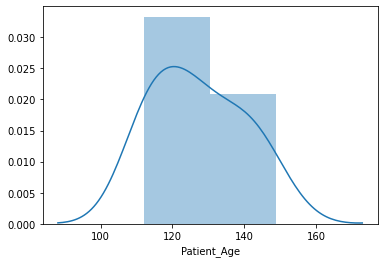

In [16]:
sns.distplot(nan_drug.Patient_Age)

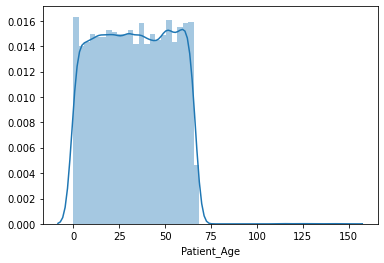

In [17]:
sns.distplot(pharma_data.Patient_Age)

In [18]:
clean_pharma_data=pharma_data.dropna(subset=['Treated_with_drugs'])

In [19]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [20]:
nan_conditions=clean_pharma_data[pharma_data.A.isnull()]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [21]:
nan_conditions.drop(labels=['A','B','C','D','E','F','Z'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
nan_conditions.drop(labels='Number_of_prev_cond',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


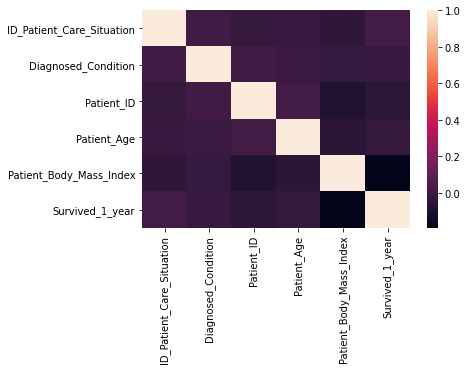

In [23]:
sns.heatmap(nan_conditions.corr())

In [24]:
# sns.pairplot(nan_conditions)

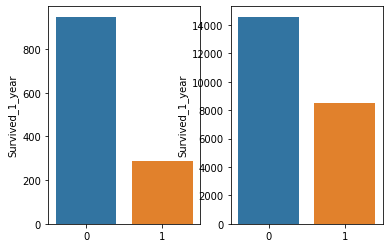

In [25]:
fig,ax = plt.subplots(1,2)
sns.barplot(nan_conditions['Survived_1_year'].unique(),nan_conditions['Survived_1_year'].value_counts(),ax=ax[0])
sns.barplot(clean_pharma_data['Survived_1_year'].unique(),clean_pharma_data['Survived_1_year'].value_counts(),ax=ax[1])

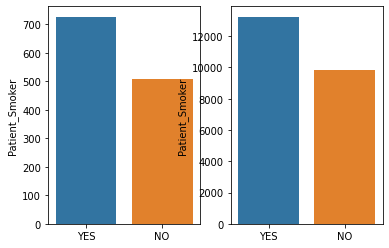

In [26]:
fig,ax = plt.subplots(1,2)
sns.barplot(nan_conditions['Patient_Smoker'].unique(),nan_conditions['Patient_Smoker'].value_counts(),ax=ax[0])
sns.barplot(clean_pharma_data['Patient_Smoker'].unique(),clean_pharma_data['Patient_Smoker'].value_counts(),ax=ax[1])

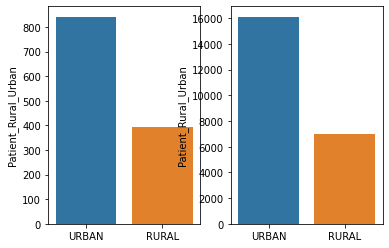

In [27]:
fig,ax = plt.subplots(1,2)
sns.barplot(nan_conditions['Patient_Rural_Urban'].unique(),nan_conditions['Patient_Rural_Urban'].value_counts(),ax=ax[0])
sns.barplot(clean_pharma_data['Patient_Rural_Urban'].unique(),clean_pharma_data['Patient_Rural_Urban'].value_counts(),ax=ax[1])

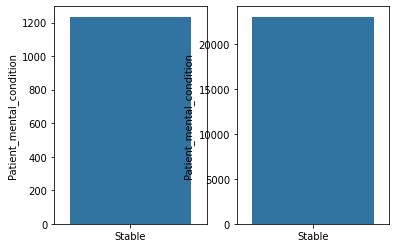

In [28]:
fig,ax = plt.subplots(1,2)
sns.barplot(nan_conditions['Patient_mental_condition'].unique(),nan_conditions['Patient_mental_condition'].value_counts(),ax=ax[0])
sns.barplot(clean_pharma_data['Patient_mental_condition'].unique(),clean_pharma_data['Patient_mental_condition'].value_counts(),ax=ax[1])

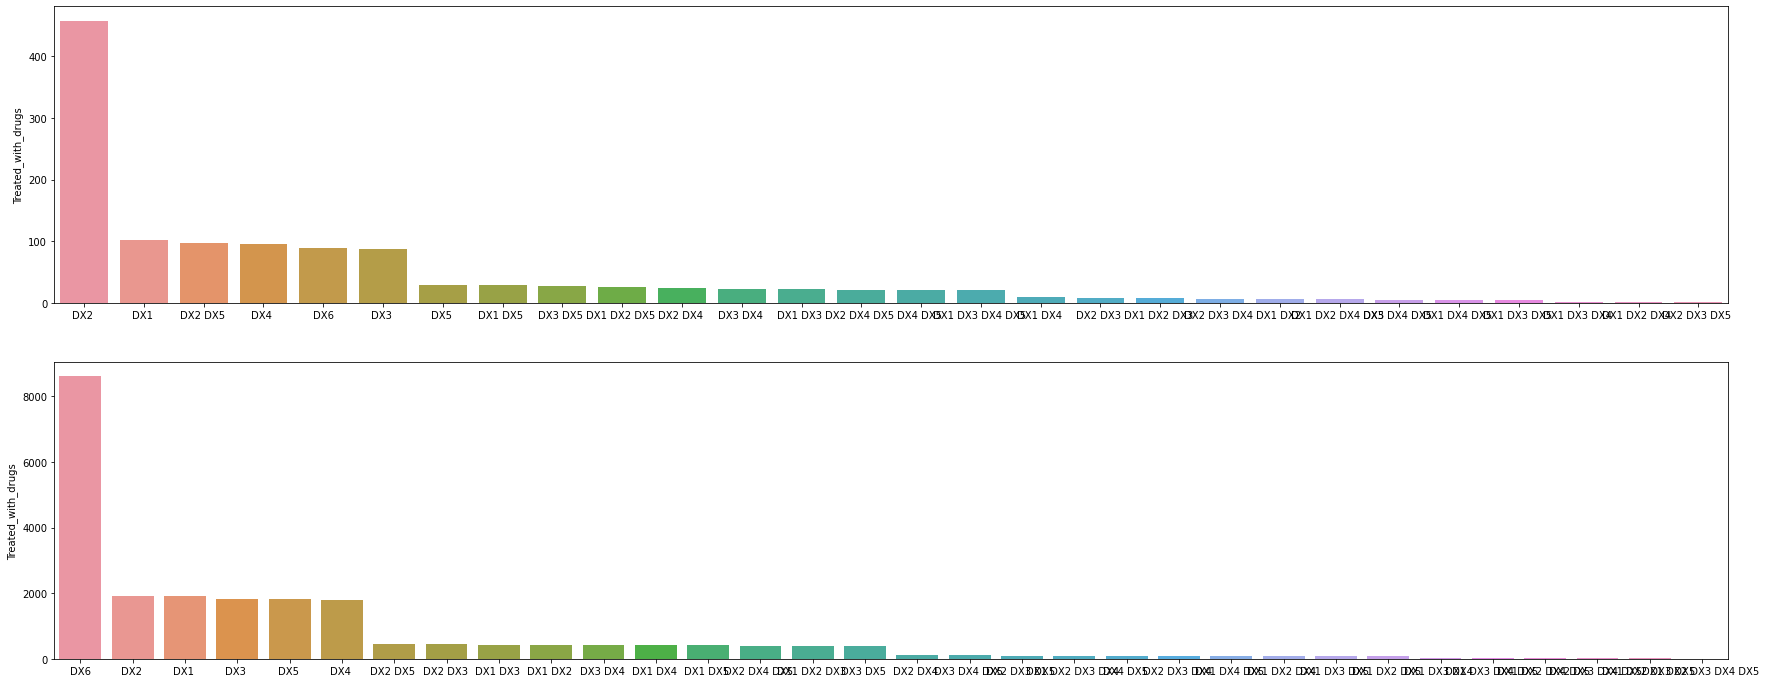

In [29]:
fig,ax = plt.subplots(2,1,figsize=[30,12])
sns.barplot(nan_conditions['Treated_with_drugs'].unique(),nan_conditions['Treated_with_drugs'].value_counts(),ax=ax[0])
sns.barplot(clean_pharma_data['Treated_with_drugs'].unique(),clean_pharma_data['Treated_with_drugs'].value_counts(),ax=ax[1])

In [30]:
for d in range(1,7):
  clean_pharma_data["DX"+str(d)]=0

for i in clean_pharma_data.index:
  for d in range(1,7):
    if "DX"+str(d) in clean_pharma_data['Treated_with_drugs'][i]:
      clean_pharma_data["DX"+str(d)][i]=1
    else:
      clean_pharma_data["DX"+str(d)][i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_

In [31]:
for d in range(1,7):
  test_new["DX"+str(d)]=0

for i in test_new.index:
  for d in range(1,7):
    if "DX"+str(d) in test_new['Treated_with_drugs'][i]:
      test_new["DX"+str(d)][i]=1
    else:
      test_new["DX"+str(d)][i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [32]:
n_drug=[int(clean_pharma_data['DX1'][clean_pharma_data['DX1']==1].value_counts()),int(clean_pharma_data['DX2'][clean_pharma_data['DX2']==1].value_counts()),
        int(clean_pharma_data['DX3'][clean_pharma_data['DX3']==1].value_counts()),int(clean_pharma_data['DX4'][clean_pharma_data['DX4']==1].value_counts()),
        int(clean_pharma_data['DX5'][clean_pharma_data['DX5']==1].value_counts()),int(clean_pharma_data['DX6'][clean_pharma_data['DX6']==1].value_counts())]
drug_index=['DX1','DX2','DX3','DX4','DX5','DX6']

drugs=pd.Series(n_drug,index=drug_index)

In [33]:
for d in range(1,7):
  nan_conditions["DX"+str(d)]=0

for i in nan_conditions.index:
  for d in range(1,7):
    if "DX"+str(d) in nan_conditions['Treated_with_drugs'][i]:
      nan_conditions["DX"+str(d)][i]=1
    else:
      nan_conditions["DX"+str(d)][i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_

In [34]:
nan_conditions_drug=[int(nan_conditions['DX1'][nan_conditions['DX1']==1].value_counts()),int(nan_conditions['DX2'][nan_conditions['DX2']==1].value_counts()),
        int(nan_conditions['DX3'][nan_conditions['DX3']==1].value_counts()),int(nan_conditions['DX4'][nan_conditions['DX4']==1].value_counts()),
        int(nan_conditions['DX5'][nan_conditions['DX5']==1].value_counts()),int(nan_conditions['DX6'][nan_conditions['DX6']==1].value_counts())]
drags_when_nan=pd.Series(nan_conditions_drug,index=drug_index)

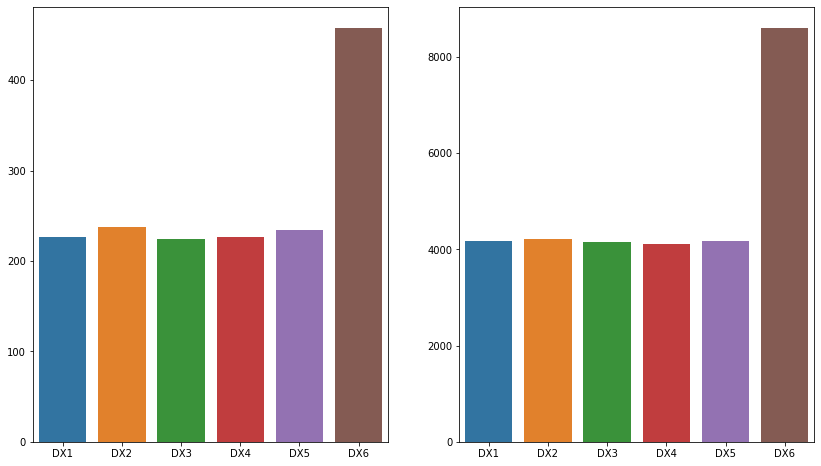

In [35]:
fig,ax = plt.subplots(1,2,figsize=[14,8])
sns.barplot(drug_index,drags_when_nan,ax=ax[0])
sns.barplot(drug_index,drugs,ax=ax[1])

In [36]:
len(clean_pharma_data['Treated_with_drugs'].unique())

32

In [37]:
multiple_medicaments=clean_pharma_data['Treated_with_drugs'].unique()[6:]
multiple_medicaments

array(['DX2 DX5 ', 'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ',
       'DX1 DX4 ', 'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ',
       'DX2 DX4 ', 'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ',
       'DX4 DX5 ', 'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ',
       'DX1 DX3 DX5 ', 'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [38]:
for medicament in multiple_medicaments:
  clean_pharma_data[medicament]=0

for i in clean_pharma_data.index:
  for medicament in multiple_medicaments:
    if clean_pharma_data['Treated_with_drugs'][i]==medicament:
      clean_pharma_data[medicament][i]=1
    else:
      clean_pharma_data[medicament][i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_

In [39]:
for medicament in multiple_medicaments:
  test_new[medicament]=0

for i in test_new.index:
  for medicament in multiple_medicaments:
    if test_new['Treated_with_drugs'][i]==medicament:
      test_new[medicament][i]=1
    else:
      test_new[medicament][i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [40]:
clean_pharma_data.drop('Treated_with_drugs',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
test_new.drop('Treated_with_drugs',axis=1,inplace=True)

In [42]:
clean_pharma_data.drop('Patient_mental_condition',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
test_new.drop('Patient_mental_condition',axis=1,inplace=True)

In [44]:
na_dropped=clean_pharma_data.dropna()

In [45]:
clean_pharma_data.fillna(clean_pharma_data.mode().iloc[0],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [46]:
test_new.fillna(clean_pharma_data.mode().iloc[0],inplace=True)

In [47]:
clean_pharma_data.drop('Z',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
test_new.drop('Z',axis=1,inplace=True)

In [49]:
clean_pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23084 non-null  int64  
 1   Diagnosed_Condition        23084 non-null  int64  
 2   Patient_ID                 23084 non-null  int64  
 3   Patient_Age                23084 non-null  int64  
 4   Patient_Body_Mass_Index    23084 non-null  float64
 5   Patient_Smoker             23084 non-null  object 
 6   Patient_Rural_Urban        23084 non-null  object 
 7   A                          23084 non-null  float64
 8   B                          23084 non-null  float64
 9   C                          23084 non-null  float64
 10  D                          23084 non-null  float64
 11  E                          23084 non-null  float64
 12  F                          23084 non-null  float64
 13  Number_of_prev_cond        23084 non-null  flo

In [50]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Patient_Age                9303 non-null   int64  
 4   Patient_Body_Mass_Index    9303 non-null   float64
 5   Patient_Smoker             9303 non-null   object 
 6   Patient_Rural_Urban        9303 non-null   object 
 7   A                          9303 non-null   float64
 8   B                          9303 non-null   float64
 9   C                          9303 non-null   float64
 10  D                          9303 non-null   float64
 11  E                          9303 non-null   float64
 12  F                          9303 non-null   float64
 13  Number_of_prev_cond        9303 non-null   float

In [51]:
conditions=['A','B','C','D','E','F']

In [52]:
from itertools import combinations

In [53]:
df_copy=pd.DataFrame(index=clean_pharma_data.index)
for combo5 in combinations(conditions,5):
  df_copy[combo5] = clean_pharma_data[combo5[0]] + clean_pharma_data[combo5[1]] + clean_pharma_data[combo5[2]] + clean_pharma_data[combo5[3]] + clean_pharma_data[combo5[4]]
df_copy.where(df_copy==5,other=0,inplace=True)
df_copy.replace(5,1,inplace=True)

for combo4 in combinations(conditions,4):
  df_copy[combo4] = clean_pharma_data[combo4[0]] + clean_pharma_data[combo4[1]] + clean_pharma_data[combo4[2]] + clean_pharma_data[combo4[3]]
df_copy.where(df_copy==4,other=0,inplace=True)
df_copy.replace(4,1,inplace=True)

for combo3 in combinations(conditions,3):
  df_copy[combo3] = clean_pharma_data[combo3[0]] + clean_pharma_data[combo3[1]] + clean_pharma_data[combo3[2]]
df_copy.where(df_copy==3,other=0,inplace=True)
df_copy.replace(3,1,inplace=True)

for combo2 in combinations(conditions,2):
  df_copy[combo2] = clean_pharma_data[combo2[0]] + clean_pharma_data[combo2[1]]
df_copy.where(df_copy==2,other=0,inplace=True)
df_copy.replace(2,1,inplace=True)

In [54]:
df_copy_new=pd.DataFrame(index=test_new.index)
for combo5 in combinations(conditions,5):
  df_copy_new[combo5] = test_new[combo5[0]] + test_new[combo5[1]] + test_new[combo5[2]] + test_new[combo5[3]] + test_new[combo5[4]]
df_copy_new.where(df_copy==5,other=0,inplace=True)
df_copy_new.replace(5,1,inplace=True)

for combo4 in combinations(conditions,4):
  df_copy_new[combo4] = test_new[combo4[0]] + test_new[combo4[1]] + test_new[combo4[2]] + test_new[combo4[3]]
df_copy_new.where(df_copy==4,other=0,inplace=True)
df_copy_new.replace(4,1,inplace=True)

for combo3 in combinations(conditions,3):
  df_copy_new[combo3] = test_new[combo3[0]] + test_new[combo3[1]] + test_new[combo3[2]]
df_copy_new.where(df_copy==3,other=0,inplace=True)
df_copy_new.replace(3,1,inplace=True)

for combo2 in combinations(conditions,2):
  df_copy_new[combo2] = test_new[combo2[0]] + test_new[combo2[1]]
df_copy_new.where(df_copy==2,other=0,inplace=True)
df_copy_new.replace(2,1,inplace=True)

In [55]:
df_copy.tail(20)

,"(A, B, C, D, E)","(A, B, C, D, F)","(A, B, C, E, F)","(A, B, D, E, F)","(A, C, D, E, F)","(B, C, D, E, F)","(A, B, C, D)","(A, B, C, E)","(A, B, C, F)","(A, B, D, E)","(A, B, D, F)","(A, B, E, F)","(A, C, D, E)","(A, C, D, F)","(A, C, E, F)","(A, D, E, F)","(B, C, D, E)","(B, C, D, F)","(B, C, E, F)","(B, D, E, F)","(C, D, E, F)","(A, B, C)","(A, B, D)","(A, B, E)","(A, B, F)","(A, C, D)","(A, C, E)","(A, C, F)","(A, D, E)","(A, D, F)","(A, E, F)","(B, C, D)","(B, C, E)","(B, C, F)","(B, D, E)","(B, D, F)","(B, E, F)","(C, D, E)","(C, D, F)","(C, E, F)","(D, E, F)","(A, B)","(A, C)","(A, D)","(A, E)","(A, F)","(B, C)","(B, D)","(B, E)","(B, F)","(C, D)","(C, E)","(C, F)","(D, E)","(D, F)","(E, F)"
23077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


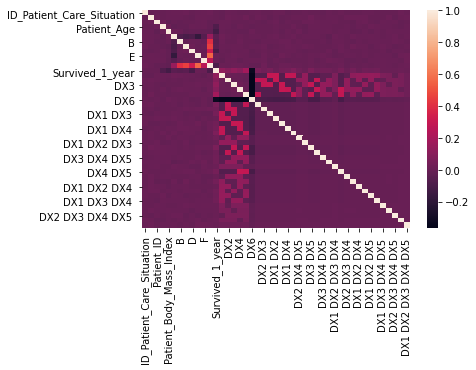

In [56]:
sns.heatmap(clean_pharma_data.corr())

In [57]:
clean_pharma_data=clean_pharma_data.merge(df_copy,how='left',left_index=True,right_index=True)

In [58]:
test_new=test_new.merge(df_copy_new,how='left',left_index=True,right_index=True)

In [59]:
clean_pharma_data['n_drugs']=clean_pharma_data['DX1']+clean_pharma_data['DX2']+clean_pharma_data['DX3']+clean_pharma_data['DX4']+clean_pharma_data['DX5']+clean_pharma_data['DX6']

In [60]:
test_new['n_drugs']=test_new['DX1']+test_new['DX2']+test_new['DX3']+test_new['DX4']+test_new['DX5']+test_new['DX6']

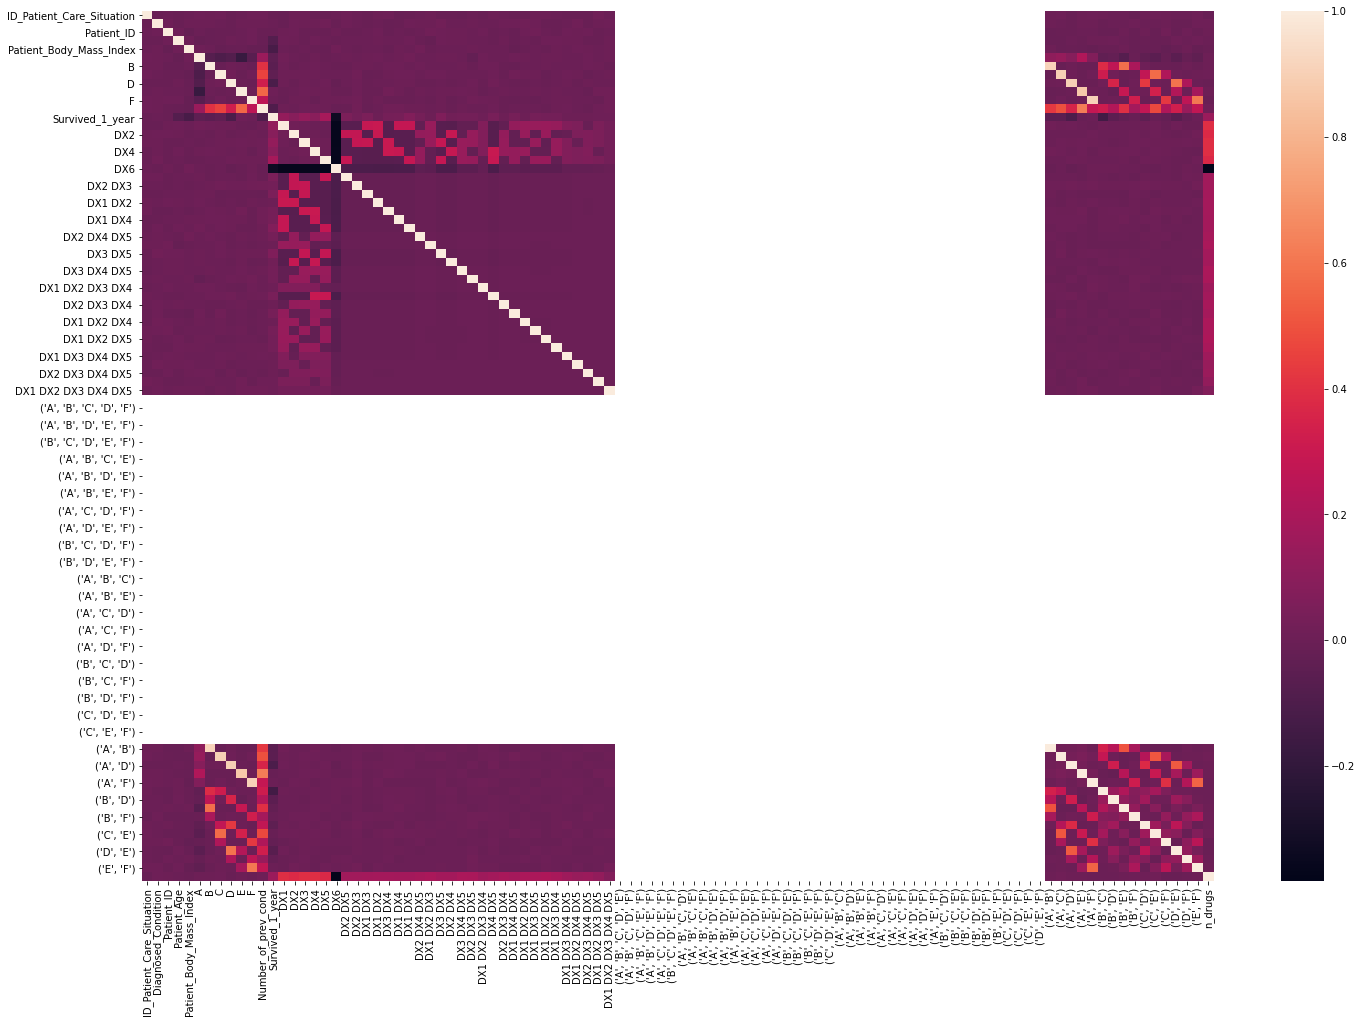

In [61]:
fig,ax = plt.subplots(figsize=[24,16])
sns.heatmap(clean_pharma_data.corr())

In [62]:
# sns.pairplot(clean_pharma_data)

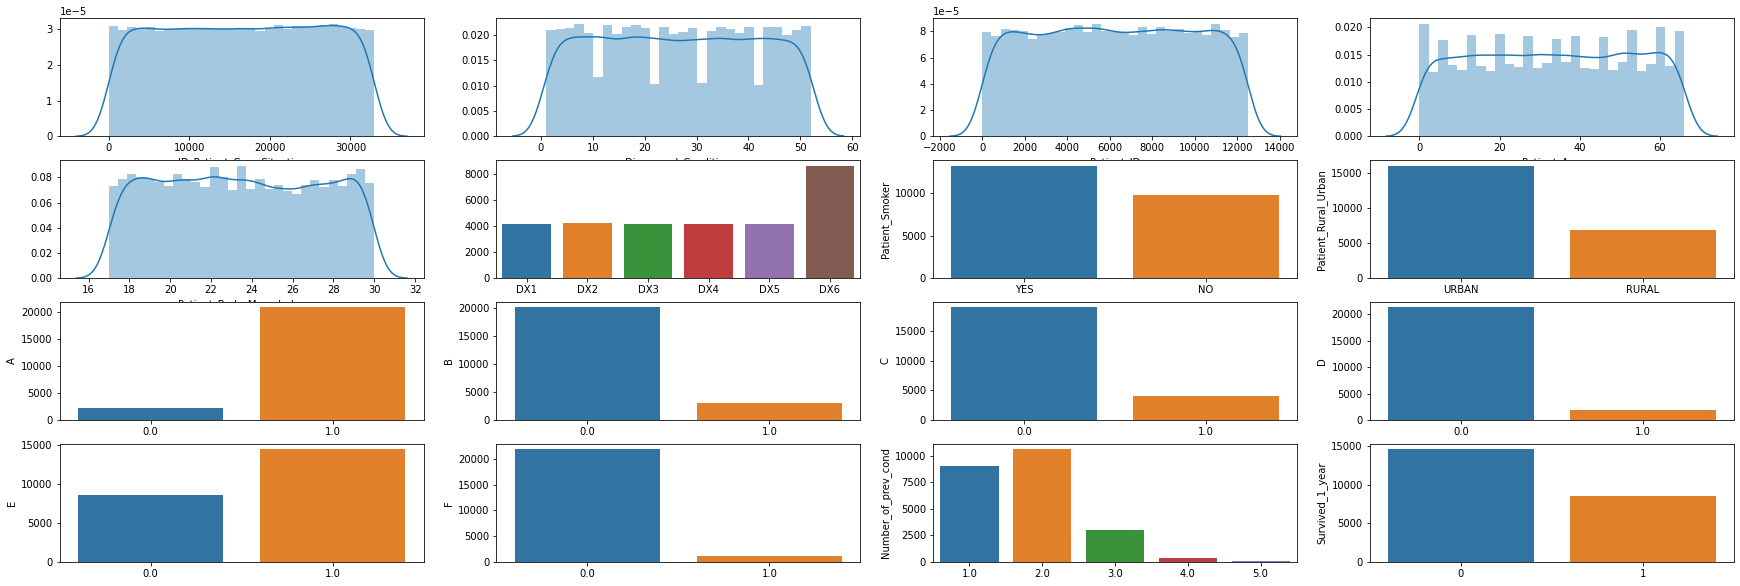

In [63]:
fig,ax=plt.subplots(4,4,figsize=[30,10])
sns.distplot(clean_pharma_data['ID_Patient_Care_Situation'],ax=ax[0,0])
sns.distplot(clean_pharma_data['Diagnosed_Condition'],ax=ax[0,1])
sns.distplot(clean_pharma_data['Patient_ID'],ax=ax[0,2])
sns.distplot(clean_pharma_data['Patient_Age'],ax=ax[0,3])
sns.distplot(clean_pharma_data['Patient_Body_Mass_Index'],ax=ax[1,0])

sns.barplot(drug_index,drugs,ax=ax[1,1])
sns.barplot(clean_pharma_data['Patient_Smoker'].unique(),clean_pharma_data['Patient_Smoker'].value_counts(),ax=ax[1,2])
sns.barplot(clean_pharma_data['Patient_Rural_Urban'].unique(),clean_pharma_data['Patient_Rural_Urban'].value_counts(),ax=ax[1,3])
sns.barplot(clean_pharma_data['A'].unique(),clean_pharma_data['A'].value_counts(),ax=ax[2,0])
sns.barplot(clean_pharma_data['B'].unique(),clean_pharma_data['B'].value_counts(),ax=ax[2,1])
sns.barplot(clean_pharma_data['C'].unique(),clean_pharma_data['C'].value_counts(),ax=ax[2,2])
sns.barplot(clean_pharma_data['D'].unique(),clean_pharma_data['D'].value_counts(),ax=ax[2,3])
sns.barplot(clean_pharma_data['E'].unique(),clean_pharma_data['E'].value_counts(),ax=ax[3,0])
sns.barplot(clean_pharma_data['F'].unique(),clean_pharma_data['F'].value_counts(),ax=ax[3,1])

sns.barplot(clean_pharma_data['Number_of_prev_cond'].unique(),clean_pharma_data['Number_of_prev_cond'].value_counts(),ax=ax[3,2])
sns.barplot(clean_pharma_data['Survived_1_year'].unique(),clean_pharma_data['Survived_1_year'].value_counts(),ax=ax[3,3])


# 'ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
#        'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
#        'Patient_Smoker', 'Patient_Rural_Urban', 'A', 'B', 'C', 'D', 'E',
#        'F', 'Number_of_prev_cond', 'Survived_1_year'

In [64]:
clean_pharma_data['Survived_1_year'].value_counts()/len(clean_pharma_data['Survived_1_year'])

1    0.63204
0    0.36796
Name: Survived_1_year, dtype: float64

In [65]:
clean_pharma_data=pd.get_dummies(clean_pharma_data)

In [66]:
test_new=pd.get_dummies(test_new)

In [67]:
clean_pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6,DX2 DX5,DX2 DX3,DX1 DX3,DX1 DX2,DX3 DX4,DX1 DX4,DX1 DX5,DX2 DX4 DX5,DX1 DX2 DX3,DX3 DX5,DX2 DX4,DX3 DX4 DX5,DX2 DX3 DX5,DX1 DX2 DX3 DX4,DX4 DX5,DX2 DX3 DX4,DX1 DX4 DX5,DX1 DX2 DX4,DX1 DX3 DX5,DX1 DX2 DX5,DX1 DX3 DX4,...,"(A, B, C)","(A, B, D)","(A, B, E)","(A, B, F)","(A, C, D)","(A, C, E)","(A, C, F)","(A, D, E)","(A, D, F)","(A, E, F)","(B, C, D)","(B, C, E)","(B, C, F)","(B, D, E)","(B, D, F)","(B, E, F)","(C, D, E)","(C, D, F)","(C, E, F)","(D, E, F)","(A, B)","(A, C)","(A, D)","(A, E)","(A, F)","(B, C)","(B, D)","(B, E)","(B, F)","(C, D)","(C, E)","(C, F)","(D, E)","(D, F)","(E, F)",n_drugs,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
5,10808,45,7977,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1


In [ ]:
# # BoostARoota important features:
# ['ID_Patient_Care_Situation',
#  'Diagnosed_Condition',
#  'Patient_ID',
#  'Patient_Age',
#  'Patient_Body_Mass_Index',
#  'A',
#  'D',
#  'Number_of_prev_cond',
#  'DX1',
#  'DX2',
#  'DX3',
#  'DX4',
#  'DX5',
#  'DX6',
#  'DX1 DX2 ',
#  'DX1 DX5 ',
#  'DX1 DX2 DX3 ',
#  ('A', 'C'),
#  ('A', 'D'),
#  ('B', 'C'),
#  'n_drugs',
#  'Patient_Smoker_NO',
#  'Patient_Rural_Urban_RURAL']

In [68]:
clean_pharma_data_relevant_feat=clean_pharma_data[[
 'ID_Patient_Care_Situation',
 'Diagnosed_Condition',
 'Patient_ID',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'A',
 'D',
 'Number_of_prev_cond',
 'DX1',
 'DX2',
 'DX3',
 'DX4',
 'DX5',
 'DX6',
 'DX1 DX2 ',
 'DX1 DX5 ',
 'DX1 DX2 DX3 ',
 ('A', 'C'),
 ('A', 'D'),
 ('B', 'C'),
 'n_drugs',
 'Patient_Smoker_NO',
 'Patient_Rural_Urban_RURAL',
 'Survived_1_year']]

In [69]:
test_new_relevant_feat=test_new[[
 'ID_Patient_Care_Situation',
 'Diagnosed_Condition',
 'Patient_ID',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'A',
 'D',
 'Number_of_prev_cond',
 'DX1',
 'DX2',
 'DX3',
 'DX4',
 'DX5',
 'DX6',
 'DX1 DX2 ',
 'DX1 DX5 ',
 'DX1 DX2 DX3 ',
 ('A', 'C'),
 ('A', 'D'),
 ('B', 'C'),
 'n_drugs',
 'Patient_Smoker_NO',
 'Patient_Rural_Urban_RURAL']]

In [70]:
clean_pharma_data_relevant_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23084 non-null  int64  
 1   Diagnosed_Condition        23084 non-null  int64  
 2   Patient_ID                 23084 non-null  int64  
 3   Patient_Age                23084 non-null  int64  
 4   Patient_Body_Mass_Index    23084 non-null  float64
 5   A                          23084 non-null  float64
 6   D                          23084 non-null  float64
 7   Number_of_prev_cond        23084 non-null  float64
 8   DX1                        23084 non-null  int64  
 9   DX2                        23084 non-null  int64  
 10  DX3                        23084 non-null  int64  
 11  DX4                        23084 non-null  int64  
 12  DX5                        23084 non-null  int64  
 13  DX6                        23084 non-null  int

In [71]:
# X_new=test_new

In [72]:
X_new=test_new_relevant_feat
X_new

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,D,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,DX1 DX2,DX1 DX5,DX1 DX2 DX3,"(A, C)","(A, D)","(B, C)",n_drugs,Patient_Smoker_NO,Patient_Rural_Urban_RURAL
0,19150,40,3709,16,29.443894,1.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,1,1,1
1,23216,52,986,24,26.836321,1.0,0.0,2.0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1,1,0
2,11890,50,11821,63,25.523280,1.0,0.0,2.0,0,0,0,1,1,0,0,0,0,0.0,0.0,0.0,2,1,1
3,7149,32,3292,42,27.171155,1.0,0.0,3.0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1,1,0
4,22845,20,9959,50,25.556192,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0,1.0,1.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,28,29.106314,1.0,0.0,3.0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1,1,1
9299,15598,7,6273,4,20.616673,1.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,1,0
9300,11885,16,11473,20,24.727357,1.0,0.0,1.0,1,0,1,1,1,0,0,0,0,0.0,0.0,0.0,4,0,0
9301,25101,50,5681,33,17.517426,1.0,1.0,5.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1,1,0


In [73]:
# X=clean_pharma_data.drop('Survived_1_year',axis=1)

In [74]:
X=clean_pharma_data_relevant_feat.drop('Survived_1_year',axis=1)

In [75]:
X.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,D,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,DX1 DX2,DX1 DX5,DX1 DX2 DX3,"(A, C)","(A, D)","(B, C)",n_drugs,Patient_Smoker_NO,Patient_Rural_Urban_RURAL
0,22374,8,3333,56,18.479385,1.0,0.0,2.0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1,0,0
1,18164,5,5740,36,22.945566,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1
2,6283,23,10446,48,27.510027,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1,0,1
3,5339,51,12011,5,19.130976,1.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,1,0
5,10808,45,7977,47,26.155120,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1,0,0


In [76]:
# y=clean_pharma_data['Survived_1_year']

In [77]:
y=clean_pharma_data_relevant_feat['Survived_1_year']

In [78]:
y

0        0
1        1
2        0
3        1
5        0
        ..
23092    0
23093    1
23094    0
23095    1
23096    0
Name: Survived_1_year, Length: 23084, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=99)

In [179]:
y_train

10018    1
6400     0
5878     1
9863     1
12691    0
        ..
21584    1
1770     0
9936     1
3244     1
13507    1
Name: Survived_1_year, Length: 16158, dtype: int64

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

In [181]:
LogReg=make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000,C=0.0018329807108324356,fit_intercept=True,penalty='l2',solver='lbfgs'))

In [182]:
LogReg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=0.0018329807108324356, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=1000, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [183]:
y_LogReg=LogReg.predict(X_test)

In [184]:
f1_test_LogReg=f1_score(y_test,y_LogReg)
f1_test_LogReg

0.8050793650793652

In [185]:
# cv_LogReg=cross_validate(LogReg,X_train,y_train,cv=10,scoring=['f1'])
# cv_LogReg

In [89]:
# f1_LogReg=cv_LogReg['test_f1'].mean()
# f1_LogReg

In [90]:
# sorted(sklearn.metrics.SCORERS.keys())

In [91]:
# params={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#         'C':np.logspace(-4, 4, 20),
#         'fit_intercept':[True,False],
#         'solver':['lbfgs', 'liblinear', 'sag', 'saga']
# }

In [92]:
# LogReg_random=GridSearchCV(LogReg,params,scoring='f1',n_jobs=-1)

In [93]:
# LogReg_random.fit(X_train,y_train)

In [94]:
# LogReg_random.best_params_

In [95]:
RanFor=make_pipeline(StandardScaler(),RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=10,min_samples_leaf=8,
                              min_samples_split=10,n_estimators=180,class_weight=None,max_features='log2',
                              oob_score=False,random_state=99))

In [96]:
RanFor.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=8,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=180, n_jobs=None,
                                        oob_score=False, random_state=99,
                                        verbose=0

In [97]:
y_RanFor=RanFor.predict(X_test)

In [99]:
f1_test_RanFor=f1_score(y_test,y_RanFor)
f1_test_RanFor

0.8596063120221246

In [100]:
# cv_RanFor=cross_validate(RanFor,X_train,y_train,cv=10,scoring=['f1'])
# cv_RanFor

In [101]:
# f1_RanFor=cv_RanFor['test_f1'].mean()
# f1_RanFor

In [102]:
# RanFor.get_params

In [103]:
# params={
#  'max_depth':  [10],                                          # rand: [10, 20, 30, 40, 50, 60, None]                        # full: [8,9, 10,11, 12]
#  'min_samples_leaf': [2],                                     # rand: range(1,10)                                           # full:[2,3,4, 5, 6]
#  'min_samples_split': [10],                                   # rand: range(1,10)                                           # full: [8, 9, 10,11]
#  'n_estimators': [180],                                      # rand: [100, 200, 400, 600, 800, 1000, 1400, 2000]            # full: [100,150,180, 200, 220,400]
#  'criterion': ['entropy'],                                                                                                  # full: ['gini','entropy']
#  'bootstrap': [False],                                                                                                      # full: [True, False]
#  'max_features': ['log2'],                                                                                                  # full: ['auto','sqrt','log2']
#  'class_weight': [None],                                                                                                    # full: ['balanced','balanced_subsample', None]
#  'oob_score': [False]                                                                                                       # full: [True,False]
# }

In [104]:
# RanFor_random=RandomizedSearchCV(RanFor,params, cv = 3,scoring='f1',n_jobs=-1)

In [105]:
# RanFor_random.fit(X_train,y_train)

In [106]:
# RanFor_random.best_params_

In [107]:
Stan_SVC=make_pipeline(StandardScaler(),SVC(gamma='auto'))

In [108]:
Stan_SVC.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [109]:
y_Stan_SVC=Stan_SVC.predict(X_test)

In [110]:
f1_test_Stan_SVC=f1_score(y_test,y_Stan_SVC)
f1_test_Stan_SVC

0.8426174496644295

In [111]:
# cv_Stan_SVC=cross_validate(Stan_SVC,X_train,y_train,cv=10,scoring=['f1'])
# cv_Stan_SVC

In [112]:
# f1_Stan_SVC=cv_Stan_SVC['test_f1'].mean()
# f1_Stan_SVC

In [113]:
Neur_Net=make_pipeline(StandardScaler(),MLPClassifier(activation='relu',alpha=0.0001,hidden_layer_sizes=(100,),learning_rate='adaptive',solver='adam',max_iter=1000))

In [115]:
Neur_Net.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='adaptive',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=1000, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [116]:
y_Neur_Net=Neur_Net.predict(X_test)

In [117]:
f1_test_Neur_Net=f1_score(y_test,y_Neur_Net)
f1_test_Neur_Net

0.8397414086423953

In [118]:
# params = {
#     'hidden_layer_sizes': [(200,), (150,), (300,)],
#     'activation': ['identity', 'logistic'],
#     'solver': ['lbfgs', 'adam'],
#     'alpha': [0.0002, 0.00005],
#     'learning_rate': ['invscaling','adaptive'],
# }

In [119]:
# Neur_Net_random=RandomizedSearchCV(Neur_Net,params,n_iter = 100, cv = 3,scoring='f1',n_jobs=-1,random_state=99)

In [120]:
# Neur_Net_random.fit(X_train,y_train)

In [121]:
# Neur_Net_random.best_params_

In [122]:
import xgboost

In [123]:
# params = {
#                       'silent':[False], 
#                       'scale_pos_weight':[1],
#                       'learning_rate':[0.2],  
#                       'subsample':[0.9],
#                       'colsample_bytree':[0.4],
#                       'objective':['binary:logistic'], 
#                       'n_estimators':[1000], 
#                       'reg_alpha':[0.3],
#                       'max_depth':[4],
#                       'min_child_weight':[1], 
#                       'booster':['gbtree'],
#                       'importance_type':['gain'],
#                       'gamma':[7]
# }

In [124]:
# xgboh_random=GridSearchCV(xgboh,params, cv = 3,scoring='f1',n_jobs=-1)

In [168]:
xgboh=xgboost.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      objective= 'binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4,
                      min_child_weight=3, 
                      booster='gbtree',
                      importance_type='gain',
                      gamma=7)


# xgboh=xgboost.XGBClassifier(silent=False, 
#                       scale_pos_weight=1,
#                       learning_rate=0.2,  
#                       colsample_bytree = 0.4,
#                       subsample = 0.9,
#                       objective='binary:logistic', 
#                       n_estimators=1000, 
#                       reg_alpha = 0.3,
#                       max_depth=4,
#                       min_child_weight=1, 
#                       booster='gbtree',
#                       importance_type='gain',
#                       gamma=7)

In [169]:
# xgboh_random.fit(X_train,y_train)

In [170]:
# xgboh_random.best_params_

In [171]:
# xgboh_random.best_score_

In [186]:
xgboh.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=7,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [187]:
y_xgb=xgboh.predict(X_test)

In [190]:
y_new=xgboh.predict(X_new)

In [189]:
f1_test_xgb=f1_score(y_test,y_xgb)
f1_test_xgb

0.8720785819126115

In [133]:
y_hat=xgboh.predict_proba(X_test)

In [134]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [135]:
y_hat=y_hat[:,1]

In [136]:
y_xgb

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [137]:
fpr,tpr, thresholds = roc_curve(y_test,y_hat)

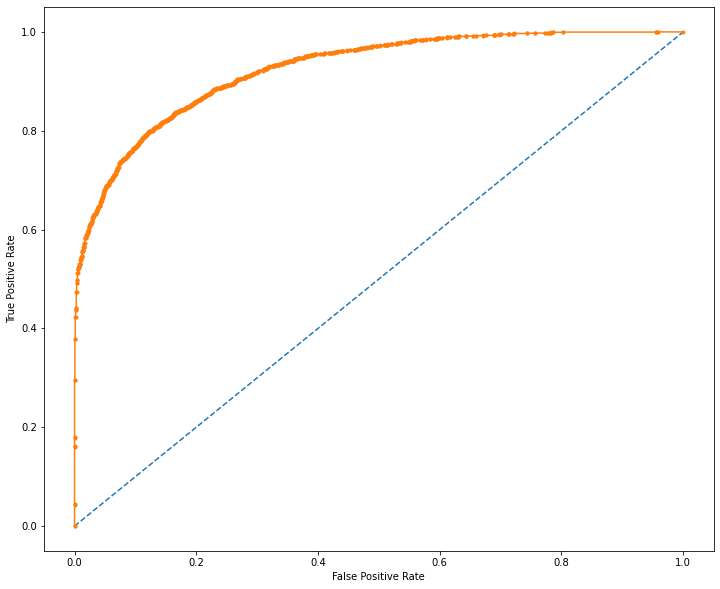

In [138]:
fig=plt.subplots(figsize=[12,10])
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
plt.plot(fpr,tpr,marker='.',label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [139]:
from sklearn.metrics import precision_recall_curve

In [140]:
precision, recall, thresholds= precision_recall_curve(y_test,y_hat)

In [141]:
no_skill=len(y_test[y_test==1])/len(y_test)

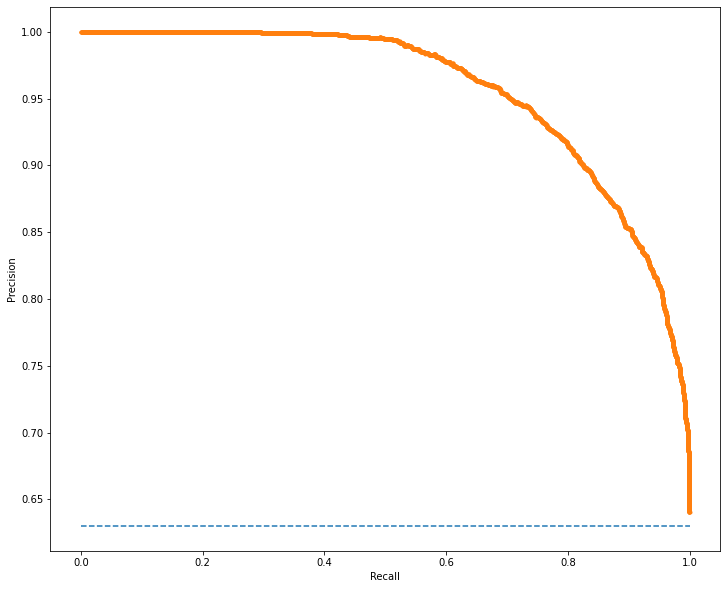

In [142]:
fig=plt.subplots(figsize=[12,10])
plt.plot([0,1],[no_skill,no_skill],linestyle='--',label='No Skill')
plt.plot(recall,precision,marker='.',label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [143]:
fscore=(2*precision*recall)/(precision+recall)

In [144]:
ix=np.argmax(fscore)
print('Best Threshold = %f, F1-score = %.3f' % (thresholds[ix],fscore[ix]))

Best Threshold = 0.401211, F1-score = 0.878


In [145]:
y_xgb_thresh= np.zeros(len(y_xgb))

In [146]:
for i in range(0,len(y_xgb)):
  if y_hat[i] <= 0.432029:
    y_xgb_thresh[i] = 0
  else:
    y_xgb_thresh[i] = 1

In [147]:
f1_score(y_test,y_xgb_thresh)

0.877336831748114

In [148]:
y_new_hat=xgboh.predict_proba(X_new)

In [149]:
y_new_hat=y_new_hat[:,1]

In [150]:
y_new_thresh= np.zeros(len(y_new_hat))

In [ ]:
for j in range(0,len(y_new_hat)):
  if y_new_hat[j] <= 0.432029:
    y_new_thresh[j] = 0
  else:
    y_new_thresh[j] = 1

In [191]:
Survived_1_year=y_new

In [192]:
res = pd.DataFrame(Survived_1_year) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ML_models=['Logistic_Regression','Random_Forest','Support_Vector_Machine','Neural_Network','XGBoost']
scores=[f1_test_LogReg,f1_test_RanFor,f1_test_Stan_SVC,f1_test_Neur_Net,f1_test_xgb]
acc_scores=[accuracy_score(y_test,y_LogReg),accuracy_score(y_test,y_RanFor),accuracy_score(y_test,y_Stan_SVC),accuracy_score(y_test,y_Neur_Net),accuracy_score(y_test,y_xgb)]

In [ ]:
for i in range(0,5):
  print(ML_models[i],':', scores[i])

Logistic_Regression : 0.8050793650793652
Random_Forest : 0.8485370051635112
Support_Vector_Machine : 0.8163486556808326
Neural_Network : 0.8287678953894714
XGBoost : 0.8718006539632428


In [ ]:
for i in range(0,5):
  print(ML_models[i],':', acc_scores[i])

Logistic_Regression : 0.7340456251804793
Random_Forest : 0.7967080565983251
Support_Vector_Machine : 0.75541438059486
Neural_Network : 0.7806814900375397
XGBoost : 0.8358359803638464


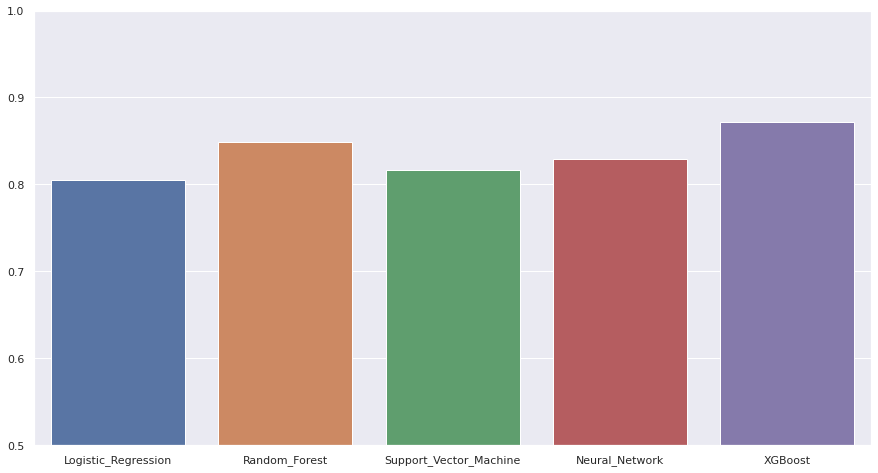

In [ ]:
sns.set()
fig,ax=plt.subplots(figsize=[15,8])
sns.barplot(ML_models,scores);
plt.ylim(0.5,1);

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_LogReg)

array([[1289, 1287],
       [ 571, 3779]])

In [ ]:
confusion_matrix(y_test,y_RanFor)

array([[1267, 1309],
       [ 234, 4116]])

In [ ]:
confusion_matrix(y_test,y_Stan_SVC)

array([[1467, 1109],
       [ 585, 3765]])

In [ ]:
confusion_matrix(y_test,y_Neur_Net)

array([[1731,  845],
       [ 674, 3676]])

In [ ]:
confusion_matrix(y_test,y_xgb)

array([[1931,  645],
       [ 488, 3862]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_LogReg))

NameError: ignored

In [ ]:
print(classification_report(y_test,y_RanFor))

              precision    recall  f1-score   support

           0       0.84      0.49      0.62      2576
           1       0.76      0.95      0.84      4350

    accuracy                           0.78      6926
   macro avg       0.80      0.72      0.73      6926
weighted avg       0.79      0.78      0.76      6926



In [ ]:
print(classification_report(y_test,y_Stan_SVC))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63      2576
           1       0.77      0.87      0.82      4350

    accuracy                           0.76      6926
   macro avg       0.74      0.72      0.73      6926
weighted avg       0.75      0.76      0.75      6926



In [ ]:
print(classification_report(y_test,y_Neur_Net))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      2576
           1       0.81      0.85      0.83      4350

    accuracy                           0.78      6926
   macro avg       0.77      0.76      0.76      6926
weighted avg       0.78      0.78      0.78      6926



In [ ]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      2576
           1       0.86      0.89      0.87      4350

    accuracy                           0.84      6926
   macro avg       0.83      0.82      0.82      6926
weighted avg       0.83      0.84      0.83      6926



In [ ]:
# pip install boruta

In [ ]:
# from boruta import BorutaPy

In [ ]:
# boru=BorutaPy(estimator=RanFor,n_estimators='auto')

In [ ]:
# boru.fit(np.array(X_train),np.array(y_train))

In [ ]:
# X.columns[boru.support_].to_list()

In [ ]:
# X.columns[boru.support_weak_].to_list()

In [ ]:
pip install boostaroota

In [ ]:
from boostaroota import BoostARoota


br = BoostARoota(clf=xgboost.XGBClassifier())

#Fit the model for the subset of variables
br.fit(X_train, y_train)
# br = BoostARoota(clf=xgboh)

#Can look at the important variables - will return a pandas series
br.keep_vars_

#Then modify dataframe to only include the important variables
# br.transform(x)

Round:  1  iteration:  1
Round:  1  iteration:  2
Round:  1  iteration:  3
Round:  1  iteration:  4
Round:  1  iteration:  5
Round:  1  iteration:  6
Round:  1  iteration:  7
Round:  1  iteration:  8
Round:  1  iteration:  9
Round:  1  iteration:  10
Round:  2  iteration:  1
Round:  2  iteration:  2
Round:  2  iteration:  3
Round:  2  iteration:  4
Round:  2  iteration:  5
Round:  2  iteration:  6
Round:  2  iteration:  7
Round:  2  iteration:  8
Round:  2  iteration:  9
Round:  2  iteration:  10
BoostARoota ran successfully! Algorithm went through  2  rounds.


0     ID_Patient_Care_Situation
1           Diagnosed_Condition
2                    Patient_ID
3                   Patient_Age
4       Patient_Body_Mass_Index
5                             A
6                             D
8           Number_of_prev_cond
9                           DX1
10                          DX2
11                          DX3
12                          DX4
13                          DX5
14                          DX6
15                     DX1 DX2 
16                     DX1 DX5 
17                 DX1 DX2 DX3 
18                       (A, C)
19                       (A, D)
20                       (B, C)
21                      n_drugs
22            Patient_Smoker_NO
23    Patient_Rural_Urban_RURAL
Name: feature, dtype: object

In [ ]:
br.keep_vars_.tolist()

['ID_Patient_Care_Situation',
 'Diagnosed_Condition',
 'Patient_ID',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'A',
 'D',
 'Number_of_prev_cond',
 'DX1',
 'DX2',
 'DX3',
 'DX4',
 'DX5',
 'DX6',
 'DX1 DX2 ',
 'DX1 DX5 ',
 'DX1 DX2 DX3 ',
 ('A', 'C'),
 ('A', 'D'),
 ('B', 'C'),
 'n_drugs',
 'Patient_Smoker_NO',
 'Patient_Rural_Urban_RURAL']

In [ ]:
# from sklearn.ensemble import StackingClassifier

In [ ]:
# estimators_lev0= [('Random_Forest', RanFor), ('Support_Vector_Machine', Stan_SVC), ('Neural_Network', Neur_Net), ('XGBoost', xgboh)]

In [ ]:
# estimator_lev1= xgboost.XGBClassifier()

In [ ]:
# model = StackingClassifier(estimators=estimators_lev0,final_estimator=estimator_lev1,cv=5)

In [ ]:
# model.fit(X_train,y_train)

In [ ]:
# y_stacked=model.predict(X_test)

In [ ]:
# f1_score(y_test,y_stacked)

In [ ]:
# y_new=model.predict(X_new)

In [ ]:
# DecTree=DecisionTreeClassifier(max_depth=4,criterion='entropy',min_samples_split=5)

In [ ]:
# DecTree.fit(X_train,y_train)

In [ ]:
# y_DecTree=DecTree.predict(X_test)

In [ ]:
# f1_test_DecTree=f1_score(y_test,y_DecTree)
# f1_test_DecTree

In [ ]:
# cv_DecTree=cross_validate(DecTree,X_train,y_train,cv=10,scoring=['f1'])
# cv_DecTree

In [ ]:
# f1_DecTree=cv_DecTree['test_f1'].mean()
# f1_DecTree

In [ ]:
# params={'criterion': ['gini', 'entropy'],
#         'splitter':['best','random'],
#         'max_depth':[1,2,3,4,5,6,7,8],
#         'min_samples_split':[2,3,4,5,6,7,8],
#         'max_leaf_nodes':[1,2,3,4,5,6,7,8],
#         'min_impurity_decrease':[1,2,3,4,5,6,7,8]
# }

In [ ]:
# DecTree_random=RandomizedSearchCV(DecTree,params,scoring='f1',n_jobs=-1,refit='f1',random_state=99)

In [ ]:
# DecTree_random.fit(X_train,y_train)

In [ ]:
# DecTree_random.best_params_

In [ ]:
# GauNB_part=GaussianNB()

In [ ]:
# GauNB_part.partial_fit(X_train,y_train,np.unique(y_train))

In [ ]:
# y_GauNB_part=GauNB_part.predict(X_test)

In [ ]:
# f1_test_GauNB_part=f1_score(y_test,y_GauNB_part)
# f1_test_GauNB_part

In [ ]:
# cv_GauNB_part=cross_validate(GauNB_part,X_train,y_train,cv=10,scoring=['f1'])
# cv_GauNB_part

In [ ]:
# f1_GauNB_part=cv_GauNB_part['test_f1'].mean()
# f1_GauNB_part

In [ ]:
# Grad_Des=make_pipeline(StandardScaler(),SGDClassifier())

In [ ]:
# Grad_Des.fit(X_train,y_train)

In [ ]:
# y_Grad_Des=Grad_Des.predict(X_test)

In [ ]:
# f1_test_Grad_Des=f1_score(y_test,y_Grad_Des)
# f1_test_Grad_Des

In [ ]:
# cv_Grad_Des=cross_validate(Grad_Des,X_train,y_train,cv=10,scoring=['f1'])
# cv_Grad_Des

In [ ]:
# f1_Grad_Des=cv_Grad_Des['test_f1'].mean()
# f1_Grad_Des